In [38]:
import pandas as pd
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_scm = pd.read_csv('worked/all_counterfactuals_with_distances.csv')

In [39]:
df_scm_invalid_thalach = df_scm[df_scm['cf_thalach']>220-df_scm['cf_age']]

In [42]:
len(df_scm_invalid_thalach)

42

In [41]:
# assuming df has orig_chol and cf_chol for all CFs
df_scm["delta_chol"] = (df_scm["orig_chol"] - df_scm["cf_chol"]).abs()

# Summary stats for the magnitude
print("Cholesterol Change Needed (mg/dL):")
print(df_scm["delta_chol"].describe())
# e.g., min, 25th, median, 75th, max

# If you only care about *valid* CFs:
df_success = df_scm[df_scm["target_changed"] == 1]
print("\Success CFs – Chol Change Needed:")
print(df_success["delta_chol"].describe())


# If you only care about *valid* CFs:
df_fail = df_scm[df_scm["target_changed"] == 0]
print("\nFailed CFs – Chol Change Needed:")
print(df_fail["delta_chol"].describe())

Cholesterol Change Needed (mg/dL):
count    237.000000
mean      56.831224
std       35.790542
min        1.000000
25%       31.000000
50%       45.000000
75%       73.000000
max      219.000000
Name: delta_chol, dtype: float64
\Success CFs – Chol Change Needed:
count     94.000000
mean      52.500000
std       28.096512
min        9.000000
25%       32.000000
50%       45.000000
75%       72.750000
max      129.000000
Name: delta_chol, dtype: float64

Failed CFs – Chol Change Needed:
count    143.000000
mean      59.678322
std       39.891508
min        1.000000
25%       31.000000
50%       46.000000
75%       80.000000
max      219.000000
Name: delta_chol, dtype: float64


In [31]:
# list the downstream features you care about
downstream = ["cp","trestbps","exang","oldpeak","thalach","slope","restecg"]

# count how many of those changed in each CF
df_scm["downstream_changes"] = df_scm.apply(
    lambda r: sum(r[f"orig_{f}"] != r[f"cf_{f}"] for f in downstream),
    axis=1
)

# summary of collateral changes
print("Downstream Features Changed per CF:")
print(df_scm["downstream_changes"].describe())

# and among valid CFs
print("\nValid CFs – Downstream Changes:")
df_success = df_scm[df_scm["target_changed"] == 1]
print(df_success["downstream_changes"].describe())


# and among valid CFs
print("\nInValid CFs – Downstream Changes:")
df_fail= df_scm[df_scm["target_changed"] == 0]
print(df_fail["downstream_changes"].describe())

Downstream Features Changed per CF:
count    237.000000
mean       5.219409
std        1.058842
min        2.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: downstream_changes, dtype: float64

Valid CFs – Downstream Changes:
count    94.000000
mean      5.755319
std       0.912119
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       7.000000
Name: downstream_changes, dtype: float64

InValid CFs – Downstream Changes:
count    143.000000
mean       4.867133
std        1.001673
min        2.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        7.000000
Name: downstream_changes, dtype: float64


In [5]:
# Let's generate some statistics and insights.

# Check immutable features: age and sex differences
df_scm["age_diff"] = df_scm["cf_age"] - df_scm["orig_age"]
df_scm["sex_diff"] = df_scm["cf_sex"] - df_scm["orig_sex"]

age_diff_stats = df_scm["age_diff"].describe()
sex_diff_stats = df_scm["sex_diff"].describe()

# Count how many rows have non-zero difference for immutable features
num_age_changed = (df_scm["age_diff"] != 0).sum()
num_sex_changed = (df_scm["sex_diff"] != 0).sum()

# Count target_changed frequency
target_changed_counts = df_scm["target_changed"].value_counts()

# Summaries for global distance metrics
euclidean_stats = df_scm["euclidean_distance"].describe()
manhattan_stats = df_scm["manhattan_distance"].describe()

# Distribution for cholesterol change
df_scm["chol_diff"] = df_scm["cf_chol"] - df_scm["orig_chol"]
chol_stats = df_scm["chol_diff"].describe()

# Unique intervention types
unique_interventions = df_scm["intervention_type"].unique()

# Calculate percentage change for cholesterol if available (not provided as separate column so compute manually)
df_scm["pct_change_chol"] = (df_scm["chol_diff"] / df_scm["orig_chol"]) * 100
pct_chol_stats = df_scm["pct_change_chol"].describe()

# Display the stats
(age_diff_stats, num_age_changed, sex_diff_stats, num_sex_changed, 
 target_changed_counts, euclidean_stats, manhattan_stats, chol_stats, pct_chol_stats, unique_interventions)


(count    237.0
 mean       0.0
 std        0.0
 min        0.0
 25%        0.0
 50%        0.0
 75%        0.0
 max        0.0
 Name: age_diff, dtype: float64,
 0,
 count    237.0
 mean       0.0
 std        0.0
 min        0.0
 25%        0.0
 50%        0.0
 75%        0.0
 max        0.0
 Name: sex_diff, dtype: float64,
 0,
 0    143
 1     94
 Name: target_changed, dtype: int64,
 count    237.000000
 mean      34.209973
 std       17.954465
 min        4.472136
 25%       20.688161
 50%       31.407642
 75%       44.045431
 max      101.705457
 Name: euclidean_distance, dtype: float64,
 count    237.000000
 mean      47.338894
 std       23.274236
 min       10.000000
 25%       29.765175
 50%       43.000000
 75%       64.000000
 max      126.000000
 Name: manhattan_distance, dtype: float64,
 count    237.000000
 mean     -55.050633
 std       38.484060
 min     -219.000000
 25%      -73.000000
 50%      -45.000000
 75%      -31.000000
 max       37.000000
 Name: chol_diff, dtype

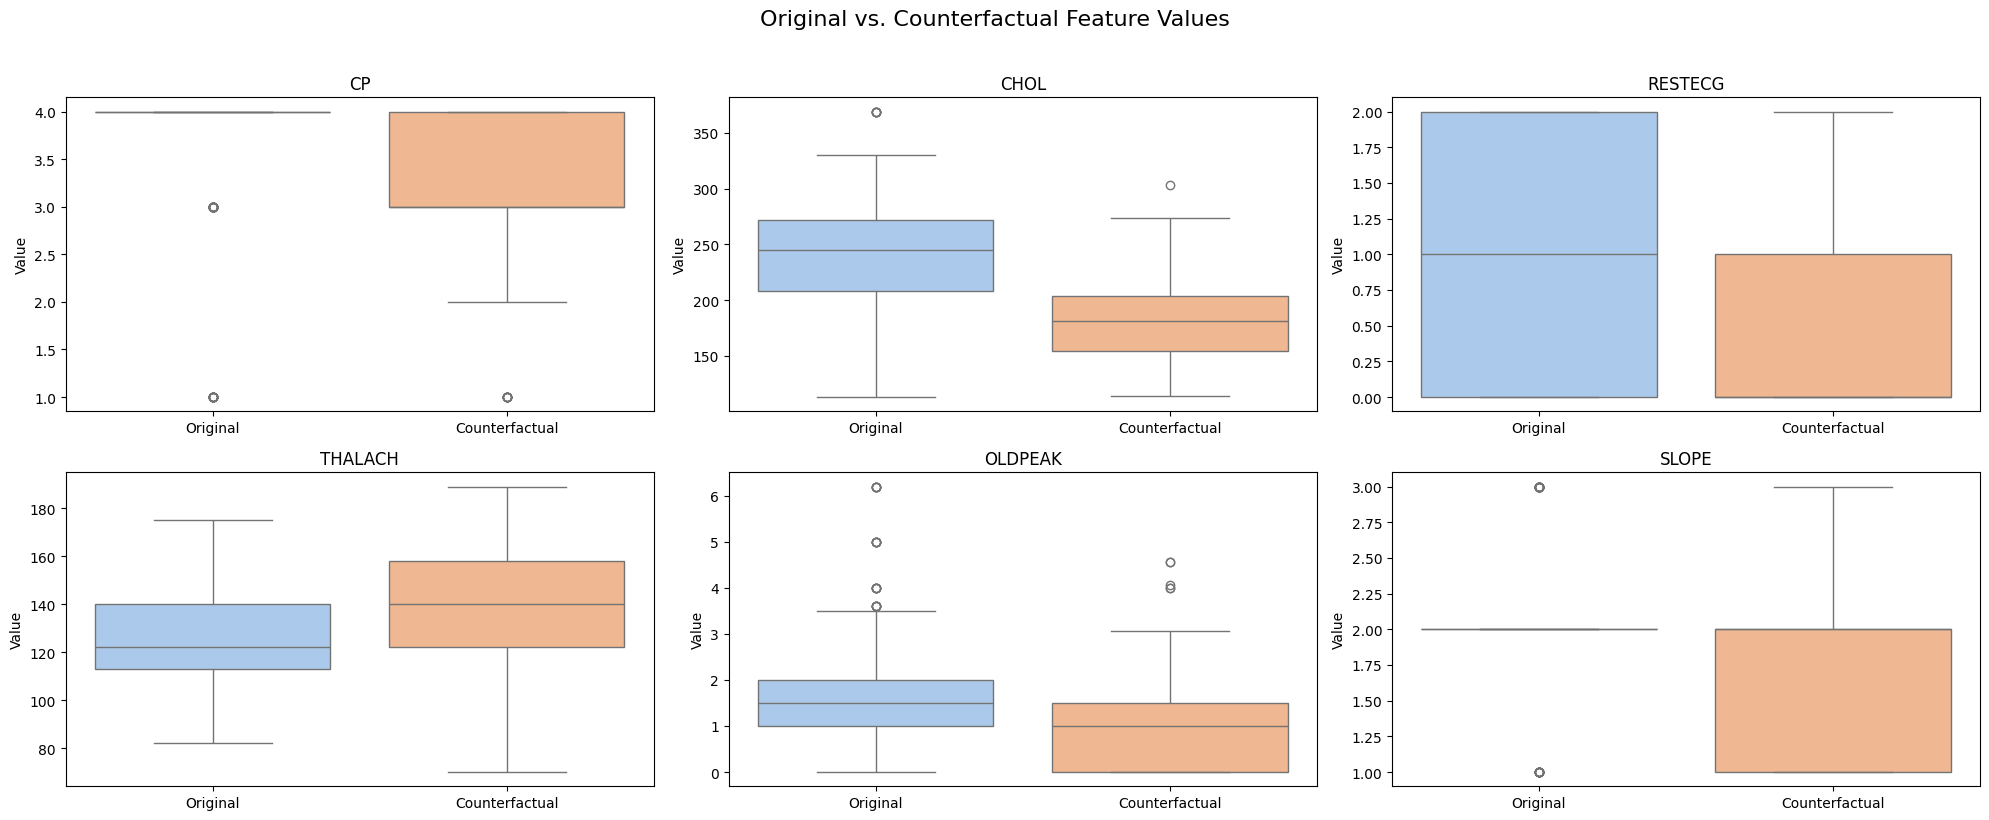

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to compare. (Including some immutable ones for completeness.)
features = [ "cp", "chol", "restecg", "thalach", "oldpeak", "slope"]

# Prepare a long-form DataFrame for plotting.
data_list = []
for feature in features:
    # For original values
    data_list.append(pd.DataFrame({
        "Feature": feature,
        "Type": "Original",
        "Value": df_scm[f"orig_{feature}"]
    }))
    # For counterfactual values
    data_list.append(pd.DataFrame({
        "Feature": feature,
        "Type": "Counterfactual",
        "Value": df_scm[f"cf_{feature}"]
    }))

df_long = pd.concat(data_list, ignore_index=True)

# Create subplots: one boxplot per feature.
n_features = len(features)
n_cols = 3  # number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8), sharey=False)
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(
        x="Type", 
        y="Value", 
        hue="Type",  # Assign `Type` to `hue`
        data=df_long[df_long["Feature"] == feature], 
        ax=ax, 
        palette="pastel",  # Changed to pastel blue colors
        dodge=False,  # Prevents splitting by hue
        legend=False  # Suppress legend
    )
    ax.set_title(f"{feature.upper()}")
    ax.set_xlabel("")
    ax.set_ylabel("Value")
    
# If there are any empty subplots, hide them
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Original vs. Counterfactual Feature Values", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import numpy as np

# Load the dataset
#df_scm = pd.read_csv("/mnt/data/all_counterfactuals_with_distances.csv")

# Filter for successful counterfactuals where target flipped (target_changed == 1)
df_success = df_scm[df_scm["target_changed"] == 1]

print("Total Successful Counterfactuals:", len(df_success))

# -------------------------------
# 1. Chest Pain Type (cp)
# -------------------------------
# Calculate how many successful CFs showed a change in chest pain type
cp_changed = (df_success["cf_cp"] != df_success["orig_cp"]).sum()
percent_cp_changed = cp_changed / len(df_success) * 100

print("\nChest Pain Type (cp):")
print(f" - {cp_changed} out of {len(df_success)} successful CFs changed cp ({percent_cp_changed:.1f}%).")

# Show frequency of original vs. CF cp values
cp_freq = pd.crosstab(df_success["orig_cp"], df_success["cf_cp"], rownames=["Orig_cp"], colnames=["CF_cp"])
print("\nChest Pain Frequency Table (Orig vs CF):")
print(cp_freq)

# -------------------------------
# 2. Exercise-Induced Angina (exang)
# -------------------------------
# Identify cases where exang changed from 1 to 0 and 0 to 1
exang_1_to_0 = ((df_success["orig_exang"] == 1) & (df_success["cf_exang"] == 0)).sum()
exang_0_to_1 = ((df_success["orig_exang"] == 0) & (df_success["cf_exang"] == 1)).sum()
percent_exang_1_to_0 = exang_1_to_0 / len(df_success) * 100
percent_exang_0_to_1 = exang_0_to_1 / len(df_success) * 100

print("\nExercise-Induced Angina (exang):")
print(f" - {exang_1_to_0} CFs ({percent_exang_1_to_0:.1f}%) changed from 1 to 0 (resolved angina).")
print(f" - {exang_0_to_1} CFs ({percent_exang_0_to_1:.1f}%) changed from 0 to 1.")

# -------------------------------
# 3. ST Depression (oldpeak)
# -------------------------------
# Calculate percent with reduced oldpeak in CF (i.e., cf_oldpeak < orig_oldpeak)
oldpeak_improved = (df_success["cf_oldpeak"] < df_success["orig_oldpeak"]).sum()
percent_oldpeak_improved = oldpeak_improved / len(df_success) * 100

# Compute mean oldpeak in diseased vs. healthy CFs and the mean difference
mean_orig_oldpeak = df_success["orig_oldpeak"].mean()
mean_cf_oldpeak = df_success["cf_oldpeak"].mean()
mean_diff_oldpeak = mean_cf_oldpeak - mean_orig_oldpeak

print("\nST Depression (oldpeak):")
print(f" - {oldpeak_improved} CFs ({percent_oldpeak_improved:.1f}%) had reduced oldpeak.")
print(f" - Mean oldpeak: Orig = {mean_orig_oldpeak:.2f} mm, CF = {mean_cf_oldpeak:.2f} mm.")
print(f" - Mean change: {mean_diff_oldpeak:.2f} mm (negative means improvement).")

# -------------------------------
# 4. Maximum Heart Rate (thalach)
# -------------------------------
# Calculate percent with increased thalach (cf_thalach > orig_thalach)
thalach_improved = (df_success["cf_thalach"] > df_success["orig_thalach"]).sum()
percent_thalach_improved = thalach_improved / len(df_success) * 100

# Compute mean thalach in diseased vs. healthy CFs and the mean change
mean_orig_thalach = df_success["orig_thalach"].mean()
mean_cf_thalach = df_success["cf_thalach"].mean()
mean_diff_thalach = mean_cf_thalach - mean_orig_thalach

print("\nMaximum Heart Rate (thalach):")
print(f" - {thalach_improved} CFs ({percent_thalach_improved:.1f}%) had increased thalach.")
print(f" - Mean thalach: Orig = {mean_orig_thalach:.1f} bpm, CF = {mean_cf_thalach:.1f} bpm.")
print(f" - Mean change: {mean_diff_thalach:.1f} bpm (positive means improvement).")

# -------------------------------
# 5. ST Slope (slope)
# -------------------------------
# Calculate percent with decreased slope (cf_slope < orig_slope) indicating improvement
slope_improved = (df_success["cf_slope"] < df_success["orig_slope"]).sum()
percent_slope_improved = slope_improved / len(df_success) * 100

print("\nST Slope (slope):")
print(f" - {slope_improved} CFs ({percent_slope_improved:.1f}%) had a decreased slope value (improved).")

# -------------------------------
# 6. Resting ECG (restecg)
# -------------------------------
# Calculate change in restecg: compute difference cf_restecg - orig_restecg
df_success["restecg_diff"] = df_success["cf_restecg"] - df_success["orig_restecg"]

# Count frequency of no change, improvement (negative diff), and worsening (positive diff)
restecg_no_change = (df_success["restecg_diff"] == 0).sum()
restecg_improved = (df_success["restecg_diff"] < 0).sum()
restecg_worsened = (df_success["restecg_diff"] > 0).sum()
percent_no_change = restecg_no_change / len(df_success) * 100
percent_improved = restecg_improved / len(df_success) * 100
percent_worsened = restecg_worsened / len(df_success) * 100

print("\nResting ECG (restecg):")
print(f" - {restecg_no_change} CFs ({percent_no_change:.1f}%) had no change.")
print(f" - {restecg_improved} CFs ({percent_improved:.1f}%) improved (restecg decreased).")
print(f" - {restecg_worsened} CFs ({percent_worsened:.1f}%) worsened (restecg increased).")

# -------------------------------
# Summary: Downstream Diagnostic Feature Changes
# -------------------------------
summary = {
    "cp_change_%": percent_cp_changed,
    "exang_1_to_0_%": percent_exang_1_to_0,
    "exang_0_to_1_%": percent_exang_0_to_1,
    "oldpeak_improved_%": percent_oldpeak_improved,
    "mean_orig_oldpeak": mean_orig_oldpeak,
    "mean_cf_oldpeak": mean_cf_oldpeak,
    "mean_diff_oldpeak": mean_diff_oldpeak,
    "thalach_improved_%": percent_thalach_improved,
    "mean_orig_thalach": mean_orig_thalach,
    "mean_cf_thalach": mean_cf_thalach,
    "mean_diff_thalach": mean_diff_thalach,
    "slope_improved_%": percent_slope_improved,
    "restecg_no_change_%": percent_no_change,
    "restecg_improved_%": percent_improved,
    "restecg_worsened_%": percent_worsened
}

print("\n--- Summary of Downstream Diagnostic Changes (Successful CFs) ---")
for k, v in summary.items():
    print(f"{k}: {v:.1f}" if isinstance(v, float) else f"{k}: {v}")


Total Successful Counterfactuals: 94

Chest Pain Type (cp):
 - 79 out of 94 successful CFs changed cp (84.0%).

Chest Pain Frequency Table (Orig vs CF):
CF_cp    1.0  2.0  3.0  4.0
Orig_cp                    
1.0        1    0    4    2
3.0        0    3    1    0
4.0        3   25   42   13

Exercise-Induced Angina (exang):
 - 59 CFs (62.8%) changed from 1 to 0 (resolved angina).
 - 4 CFs (4.3%) changed from 0 to 1.

ST Depression (oldpeak):
 - 68 CFs (72.3%) had reduced oldpeak.
 - Mean oldpeak: Orig = 1.75 mm, CF = 0.28 mm.
 - Mean change: -1.47 mm (negative means improvement).

Maximum Heart Rate (thalach):
 - 66 CFs (70.2%) had increased thalach.
 - Mean thalach: Orig = 127.6 bpm, CF = 145.3 bpm.
 - Mean change: 17.7 bpm (positive means improvement).

ST Slope (slope):
 - 76 CFs (80.9%) had a decreased slope value (improved).

Resting ECG (restecg):
 - 41 CFs (43.6%) had no change.
 - 30 CFs (31.9%) improved (restecg decreased).
 - 23 CFs (24.5%) worsened (restecg increased).

---

C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_34720\2085451310.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_success["restecg_diff"] = df_success["cf_restecg"] - df_success["orig_restecg"]


In [16]:
# -------------------------------
# X. Resting Blood Pressure (trestbps)
# -------------------------------
# Compute counts for decreased, increased, and unchanged trestbps
trestbps_decreased = (df_success["cf_trestbps"] < df_success["orig_trestbps"]).sum()
trestbps_increased = (df_success["cf_trestbps"] > df_success["orig_trestbps"]).sum()
trestbps_unchanged = (df_success["cf_trestbps"] == df_success["orig_trestbps"]).sum()

# Compute percentages
pct_decreased = trestbps_decreased / len(df_success) * 100
pct_increased = trestbps_increased / len(df_success) * 100
pct_unchanged = trestbps_unchanged / len(df_success) * 100

# Compute means and mean difference
mean_orig_trestbps = df_success["orig_trestbps"].mean()
mean_cf_trestbps   = df_success["cf_trestbps"].mean()
mean_diff_trestbps = mean_cf_trestbps - mean_orig_trestbps

print("\nResting Blood Pressure (trestbps):")
print(f" - {trestbps_decreased} CFs ({pct_decreased:.1f}%) showed a decrease in trestbps.")
print(f" - {trestbps_increased} CFs ({pct_increased:.1f}%) showed an increase in trestbps.")
print(f" - {trestbps_unchanged} CFs ({pct_unchanged:.1f}%) had no change.")
print(f" - Mean trestbps: Orig = {mean_orig_trestbps:.1f} mmHg, CF = {mean_cf_trestbps:.1f} mmHg.")
print(f" - Mean change: {mean_diff_trestbps:.1f} mmHg (negative means net improvement).")

# Add to your summary dictionary:
summary.update({
    "trestbps_decreased_%": pct_decreased,
    "trestbps_increased_%": pct_increased,
    "trestbps_unchanged_%": pct_unchanged,
    "mean_orig_trestbps": mean_orig_trestbps,
    "mean_cf_trestbps": mean_cf_trestbps,
    "mean_diff_trestbps": mean_diff_trestbps
})



Resting Blood Pressure (trestbps):
 - 59 CFs (62.8%) showed a decrease in trestbps.
 - 34 CFs (36.2%) showed an increase in trestbps.
 - 1 CFs (1.1%) had no change.
 - Mean trestbps: Orig = 132.8 mmHg, CF = 128.9 mmHg.
 - Mean change: -3.9 mmHg (negative means net improvement).


In [5]:
import pandas as pd
import numpy as np

# Load the dataset
#df_scm = pd.read_csv("/mnt/data/all_counterfactuals_with_distances.csv")

# Filter for successful counterfactuals where target flipped (target_changed == 1)
df_no_success = df_scm[df_scm["target_changed"] == 0]

print("Total Successful Counterfactuals:", len(df_no_success))

# -------------------------------
# 1. Chest Pain Type (cp)
# -------------------------------
# Calculate how many successful CFs showed a change in chest pain type
cp_changed = (df_no_success["cf_cp"] != df_no_success["orig_cp"]).sum()
percent_cp_changed = cp_changed / len(df_no_success) * 100

print("\nChest Pain Type (cp):")
print(f" - {cp_changed} out of {len(df_no_success)} successful CFs changed cp ({percent_cp_changed:.1f}%).")

# Show frequency of original vs. CF cp values
cp_freq = pd.crosstab(df_no_success["orig_cp"], df_no_success["cf_cp"], rownames=["Orig_cp"], colnames=["CF_cp"])
print("\nChest Pain Frequency Table (Orig vs CF):")
print(cp_freq)

# -------------------------------
# 2. Exercise-Induced Angina (exang)
# -------------------------------
# Identify cases where exang changed from 1 to 0 and 0 to 1
exang_1_to_0 = ((df_no_success["orig_exang"] == 1) & (df_no_success["cf_exang"] == 0)).sum()
exang_0_to_1 = ((df_no_success["orig_exang"] == 0) & (df_no_success["cf_exang"] == 1)).sum()
percent_exang_1_to_0 = exang_1_to_0 / len(df_no_success) * 100
percent_exang_0_to_1 = exang_0_to_1 / len(df_no_success) * 100

print("\nExercise-Induced Angina (exang):")
print(f" - {exang_1_to_0} CFs ({percent_exang_1_to_0:.1f}%) changed from 1 to 0 (resolved angina).")
print(f" - {exang_0_to_1} CFs ({percent_exang_0_to_1:.1f}%) changed from 0 to 1.")

# -------------------------------
# 3. ST Depression (oldpeak)
# -------------------------------
# Calculate percent with reduced oldpeak in CF (i.e., cf_oldpeak < orig_oldpeak)
oldpeak_improved = (df_no_success["cf_oldpeak"] < df_no_success["orig_oldpeak"]).sum()
percent_oldpeak_improved = oldpeak_improved / len(df_no_success) * 100

# Compute mean oldpeak in diseased vs. healthy CFs and the mean difference
mean_orig_oldpeak = df_no_success["orig_oldpeak"].mean()
mean_cf_oldpeak = df_no_success["cf_oldpeak"].mean()
mean_diff_oldpeak = mean_cf_oldpeak - mean_orig_oldpeak

print("\nST Depression (oldpeak):")
print(f" - {oldpeak_improved} CFs ({percent_oldpeak_improved:.1f}%) had reduced oldpeak.")
print(f" - Mean oldpeak: Orig = {mean_orig_oldpeak:.2f} mm, CF = {mean_cf_oldpeak:.2f} mm.")
print(f" - Mean change: {mean_diff_oldpeak:.2f} mm (negative means improvement).")

# -------------------------------
# 4. Maximum Heart Rate (thalach)
# -------------------------------
# Calculate percent with increased thalach (cf_thalach > orig_thalach)
thalach_improved = (df_no_success["cf_thalach"] > df_no_success["orig_thalach"]).sum()
percent_thalach_improved = thalach_improved / len(df_no_success) * 100

# Compute mean thalach in diseased vs. healthy CFs and the mean change
mean_orig_thalach = df_no_success["orig_thalach"].mean()
mean_cf_thalach = df_no_success["cf_thalach"].mean()
mean_diff_thalach = mean_cf_thalach - mean_orig_thalach

print("\nMaximum Heart Rate (thalach):")
print(f" - {thalach_improved} CFs ({percent_thalach_improved:.1f}%) had increased thalach.")
print(f" - Mean thalach: Orig = {mean_orig_thalach:.1f} bpm, CF = {mean_cf_thalach:.1f} bpm.")
print(f" - Mean change: {mean_diff_thalach:.1f} bpm (positive means improvement).")

# -------------------------------
# 5. ST Slope (slope)
# -------------------------------
# Calculate percent with decreased slope (cf_slope < orig_slope) indicating improvement
slope_improved = (df_no_success["cf_slope"] < df_no_success["orig_slope"]).sum()
percent_slope_improved = slope_improved / len(df_no_success) * 100

print("\nST Slope (slope):")
print(f" - {slope_improved} CFs ({percent_slope_improved:.1f}%) had a decreased slope value (improved).")

# -------------------------------
# 6. Resting ECG (restecg)
# -------------------------------
# Calculate change in restecg: compute difference cf_restecg - orig_restecg
df_no_success["restecg_diff"] = df_no_success["cf_restecg"] - df_no_success["orig_restecg"]

# Count frequency of no change, improvement (negative diff), and worsening (positive diff)
restecg_no_change = (df_no_success["restecg_diff"] == 0).sum()
restecg_improved = (df_no_success["restecg_diff"] < 0).sum()
restecg_worsened = (df_no_success["restecg_diff"] > 0).sum()
percent_no_change = restecg_no_change / len(df_no_success) * 100
percent_improved = restecg_improved / len(df_no_success) * 100
percent_worsened = restecg_worsened / len(df_no_success) * 100

print("\nResting ECG (restecg):")
print(f" - {restecg_no_change} CFs ({percent_no_change:.1f}%) had no change.")
print(f" - {restecg_improved} CFs ({percent_improved:.1f}%) improved (restecg decreased).")
print(f" - {restecg_worsened} CFs ({percent_worsened:.1f}%) worsened (restecg increased).")

# -------------------------------
# Summary: Downstream Diagnostic Feature Changes
# -------------------------------
summary = {
    "cp_change_%": percent_cp_changed,
    "exang_1_to_0_%": percent_exang_1_to_0,
    "exang_0_to_1_%": percent_exang_0_to_1,
    "oldpeak_improved_%": percent_oldpeak_improved,
    "mean_orig_oldpeak": mean_orig_oldpeak,
    "mean_cf_oldpeak": mean_cf_oldpeak,
    "mean_diff_oldpeak": mean_diff_oldpeak,
    "thalach_improved_%": percent_thalach_improved,
    "mean_orig_thalach": mean_orig_thalach,
    "mean_cf_thalach": mean_cf_thalach,
    "mean_diff_thalach": mean_diff_thalach,
    "slope_improved_%": percent_slope_improved,
    "restecg_no_change_%": percent_no_change,
    "restecg_improved_%": percent_improved,
    "restecg_worsened_%": percent_worsened
}

print("\n--- Summary of Downstream Diagnostic Changes (Successful CFs) ---")
for k, v in summary.items():
    print(f"{k}: {v:.1f}" if isinstance(v, float) else f"{k}: {v}")


Total Successful Counterfactuals: 143

Chest Pain Type (cp):
 - 67 out of 143 successful CFs changed cp (46.9%).

Chest Pain Frequency Table (Orig vs CF):
CF_cp    1.0  2.0  3.0  4.0
Orig_cp                    
1.0        0    1    2    5
3.0        3    3    2   13
4.0        2    6   32   74

Exercise-Induced Angina (exang):
 - 24 CFs (16.8%) changed from 1 to 0 (resolved angina).
 - 27 CFs (18.9%) changed from 0 to 1.

ST Depression (oldpeak):
 - 79 CFs (55.2%) had reduced oldpeak.
 - Mean oldpeak: Orig = 1.61 mm, CF = 1.38 mm.
 - Mean change: -0.22 mm (negative means improvement).

Maximum Heart Rate (thalach):
 - 87 CFs (60.8%) had increased thalach.
 - Mean thalach: Orig = 125.7 bpm, CF = 134.2 bpm.
 - Mean change: 8.5 bpm (positive means improvement).

ST Slope (slope):
 - 34 CFs (23.8%) had a decreased slope value (improved).

Resting ECG (restecg):
 - 45 CFs (31.5%) had no change.
 - 66 CFs (46.2%) improved (restecg decreased).
 - 32 CFs (22.4%) worsened (restecg increased).



C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_29292\774975296.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_success["restecg_diff"] = df_no_success["cf_restecg"] - df_no_success["orig_restecg"]


For every unit change in cholesterol, resting BP changes by -0.04 units on average.


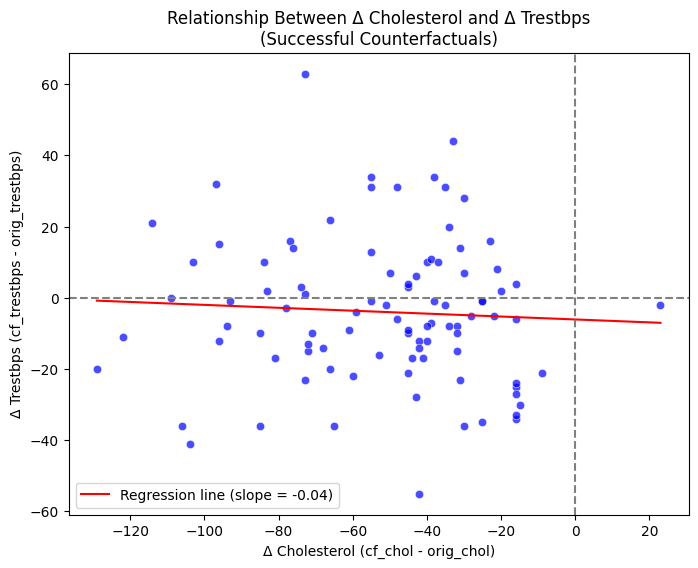

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate differences for cholesterol and resting blood pressure
df_scm["delta_chol"] = df_scm["cf_chol"] - df_scm["orig_chol"]
df_scm["delta_trestbps"] = df_scm["cf_trestbps"] - df_scm["orig_trestbps"]

# Filter for successful counterfactuals (where target_changed == 1)
df_success = df_scm[df_scm["target_changed"] == 1]

# Perform linear regression using numpy.polyfit to determine the slope
slope, intercept = np.polyfit(df_success["delta_chol"], df_success["delta_trestbps"], 1)
print(f"For every unit change in cholesterol, resting BP changes by {slope:.2f} units on average.")

# Plot the scatter plot with the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x="delta_chol", y="delta_trestbps", data=df_success, color="blue", alpha=0.7)
x_vals = np.linspace(df_success["delta_chol"].min(), df_success["delta_chol"].max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color="red", label=f"Regression line (slope = {slope:.2f})")
plt.title("Relationship Between Δ Cholesterol and Δ Trestbps\n(Successful Counterfactuals)")
plt.xlabel("Δ Cholesterol (cf_chol - orig_chol)")
plt.ylabel("Δ Trestbps (cf_trestbps - orig_trestbps)")
plt.axhline(0, color="grey", linestyle="--")
plt.axvline(0, color="grey", linestyle="--")
plt.legend()
plt.show()


Total Successful CFs: 94
Total Unsuccessful CFs: 143

Age (Original):
 - Successful CFs mean age: 53.90 years
 - Unsuccessful CFs mean age: 59.17 years
 - Difference: 5.27 years (unsuccessful - successful)

Gender (Original):
Successful CFs:
0.0    20
1.0    74
Name: orig_sex, dtype: int64
Unsuccessful CFs:
1.0    143
Name: orig_sex, dtype: int64

Percentage Distribution:
Successful CFs:
0.0    21.276596
1.0    78.723404
Name: orig_sex, dtype: float64
Unsuccessful CFs:
1.0    100.0
Name: orig_sex, dtype: float64


--- Improvement Summary in Non-Successful Counterfactuals ---
CP:
  Mean Original: 3.69
  Mean Counterfactual: 3.50
  Mean Difference: -0.18
  Percentage improved: 14.7%

EXANG:
  Mean Original: 0.73
  Mean Counterfactual: 0.75
  Mean Difference: 0.02
  Percentage improved: 16.8%

OLDPEAK:
  Mean Original: 1.61
  Mean Counterfactual: 1.38
  Mean Difference: -0.22
  Percentage improved: 55.2%

THALACH:
  Mean Original: 125.72
  Mean Counterfactual: 134.24
  Mean Difference: 8.

C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_6656\2307299461.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scm, x="target_changed", y="orig_age", palette="pastel", ax=axes[0])


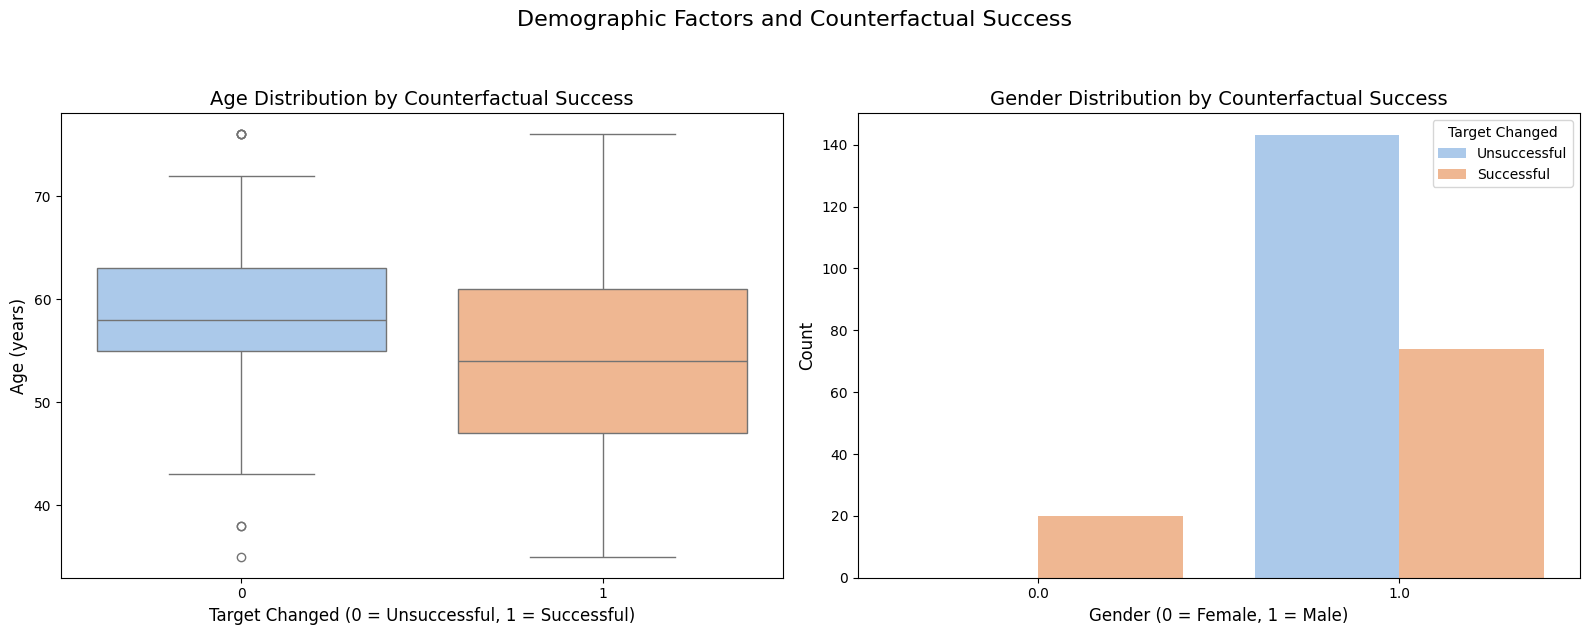

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# -------------------------------
# 1. Filter Successful vs Unsuccessful Counterfactuals
# -------------------------------
df_success = df_scm[df_scm["target_changed"] == 1].copy()
df_unsuccess = df_scm[df_scm["target_changed"] == 0].copy()

print(f"Total Successful CFs: {len(df_success)}")
print(f"Total Unsuccessful CFs: {len(df_unsuccess)}\n")

# -------------------------------
# 2. Compare Demographics: Age and Gender
# -------------------------------
# Summary statistics for Age
age_success_mean = df_success["orig_age"].mean()
age_unsuccess_mean = df_unsuccess["orig_age"].mean()

print("Age (Original):")
print(f" - Successful CFs mean age: {age_success_mean:.2f} years")
print(f" - Unsuccessful CFs mean age: {age_unsuccess_mean:.2f} years")
print(f" - Difference: {age_unsuccess_mean - age_success_mean:.2f} years (unsuccessful - successful)\n")

# Gender distribution: count and percentage (sex: 0=female, 1=male)
gender_success = df_success["orig_sex"].value_counts().sort_index()
gender_unsuccess = df_unsuccess["orig_sex"].value_counts().sort_index()

print("Gender (Original):")
print("Successful CFs:")
print(gender_success)
print("Unsuccessful CFs:")
print(gender_unsuccess)
print("")
# Calculate percentages
perc_success = gender_success / len(df_success) * 100
perc_unsuccess = gender_unsuccess / len(df_unsuccess) * 100

print("Percentage Distribution:")
print("Successful CFs:")
print(perc_success)
print("Unsuccessful CFs:")
print(perc_unsuccess)
print("")

# -------------------------------
# 3. Quantify Outcome Improvements in Non-Successful Counterfactuals
# -------------------------------
# Define downstream features and improvement conditions:
# For cp: higher is better (assuming cp: 1=typical angina, 4=asymptomatic)
# For exang: improvement if changes from 1 to 0.
# For oldpeak: improvement if cf_oldpeak < orig_oldpeak.
# For thalach: improvement if cf_thalach > orig_thalach.
# For slope: improvement if cf_slope < orig_slope (lower = upsloping).
# For restecg: improvement if cf_restecg < orig_restecg (assuming 0 = normal).
# For trestbps: improvement if cf_trestbps < orig_trestbps.

downstream_features = ["cp", "exang", "oldpeak", "thalach", "slope", "restecg", "trestbps"]

# Compute differences in non-successful group
for feat in downstream_features:
    df_unsuccess[f"{feat}_diff"] = df_unsuccess[f"cf_{feat}"] - df_unsuccess[f"orig_{feat}"]

# Define a helper function to flag improvement for each feature.
def flag_improvement(row, feature):
    # For continuous features
    if feature in ["oldpeak", "trestbps"]:
        return 1 if row[f"{feature}_diff"] < 0 else 0
    elif feature == "thalach":
        return 1 if row[f"{feature}_diff"] > 0 else 0
    elif feature in ["cp", "slope", "restecg"]:
        # Here we assume that for cp higher values are better (i.e. 4 is best)
        # For slope and restecg, lower values are preferred.
        if feature == "cp":
            return 1 if row[f"{feature}_diff"] > 0 else 0
        else:
            return 1 if row[f"{feature}_diff"] < 0 else 0
    elif feature == "exang":
        # exang is binary: improvement if 1 changes to 0.
        return 1 if (row["orig_exang"] == 1 and row["cf_exang"] == 0) else 0
    else:
        return np.nan

# Apply the function for each downstream feature in the unsuccessful group.
for feat in downstream_features:
    df_unsuccess[f"{feat}_improved"] = df_unsuccess.apply(lambda row: flag_improvement(row, feat), axis=1)

# Summarize the improvements for each feature.
improvement_summary = {}
for feat in downstream_features:
    # Calculate percentage of patients that show improvement in the given feature.
    pct_improve = df_unsuccess[f"{feat}_improved"].mean() * 100
    # Calculate mean original, mean CF, and mean difference
    mean_orig = df_unsuccess[f"orig_{feat}"].mean()
    mean_cf = df_unsuccess[f"cf_{feat}"].mean()
    mean_diff = mean_cf - mean_orig
    improvement_summary[feat] = {
        "mean_orig": mean_orig,
        "mean_cf": mean_cf,
        "mean_diff": mean_diff,
        "pct_improve": pct_improve
    }

print("\n--- Improvement Summary in Non-Successful Counterfactuals ---")
for feat, stats in improvement_summary.items():
    print(f"{feat.upper()}:")
    print(f"  Mean Original: {stats['mean_orig']:.2f}")
    print(f"  Mean Counterfactual: {stats['mean_cf']:.2f}")
    print(f"  Mean Difference: {stats['mean_diff']:.2f}")
    print(f"  Percentage improved: {stats['pct_improve']:.1f}%\n")

# -------------------------------
# 4. Visualize Demographic Differences
# -------------------------------
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Age distribution boxplot
sns.boxplot(data=df_scm, x="target_changed", y="orig_age", palette="pastel", ax=axes[0])
axes[0].set_title("Age Distribution by Counterfactual Success", fontsize=14)
axes[0].set_xlabel("Target Changed (0 = Unsuccessful, 1 = Successful)", fontsize=12)
axes[0].set_ylabel("Age (years)", fontsize=12)

# Second subplot: Gender distribution countplot
sns.countplot(data=df_scm, x="orig_sex", hue="target_changed", palette="pastel", ax=axes[1])
axes[1].set_title("Gender Distribution by Counterfactual Success", fontsize=14)
axes[1].set_xlabel("Gender (0 = Female, 1 = Male)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(title="Target Changed", labels=["Unsuccessful", "Successful"])

# Add a super title for the entire figure
fig.suptitle("Demographic Factors and Counterfactual Success", fontsize=16, y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()


Patients with ≥1 successful CF: 41
Patients with no successful CF: 7

--- SUCCESSFUL PATIENTS ---
Count: 41
Age: mean = 56.7, std = 8.9, range = [35.0, 76.0]
Sex (M:F) = 37:4

--- UNSUCCESSFUL PATIENTS ---
Count: 7
Age: mean = 59.3, std = 5.0, range = [54.0, 67.0]
Sex (M:F) = 7:0

--- Downstream Diagnostic Changes (Successful CFs) ---
                                value
orig_trestbps_decreased_%   62.765957
orig_trestbps_increased_%   36.170213
orig_trestbps_unchanged_%    1.063830
mean_orig_orig_trestbps    132.829787
mean_cf_cf_trestbps        128.882979
mean_diff_orig_trestbps     -3.946809
orig_cp_decreased_%         77.659574
orig_cp_increased_%          6.382979
orig_cp_unchanged_%         15.957447
mean_orig_orig_cp            3.734043
mean_cf_cf_cp                2.776596
mean_diff_orig_cp           -0.957447
exang_1_to_0_%              62.765957
exang_0_to_1_%               4.255319
orig_oldpeak_decreased_%    72.340426
orig_oldpeak_increased_%    14.893617
orig_oldpeak_unch

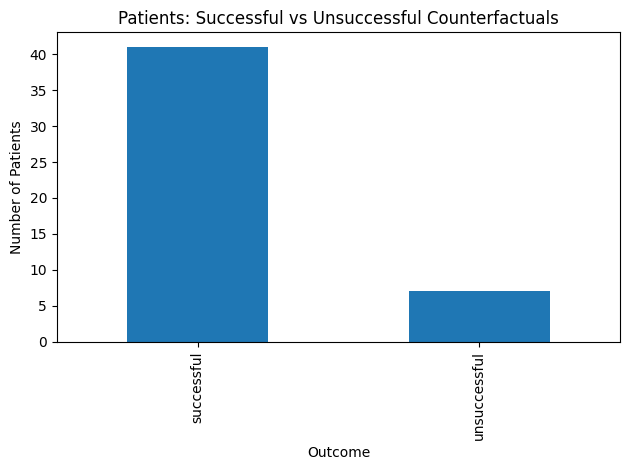

<Figure size 640x480 with 0 Axes>

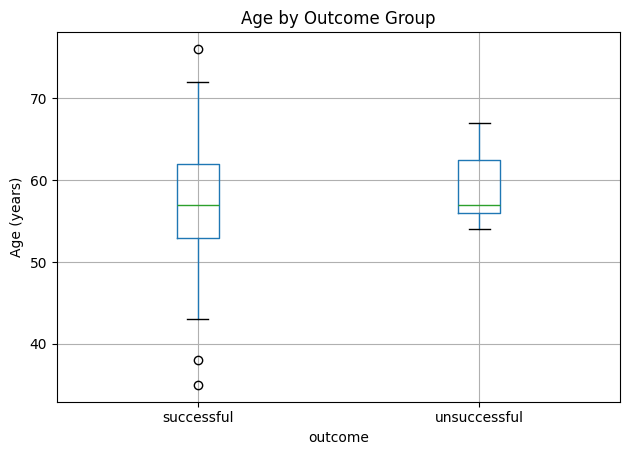

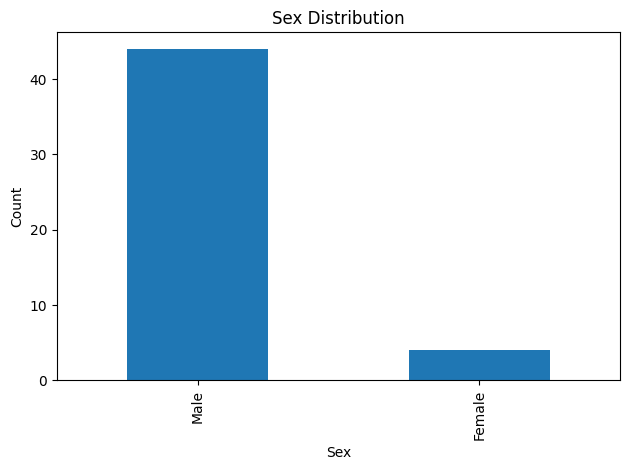

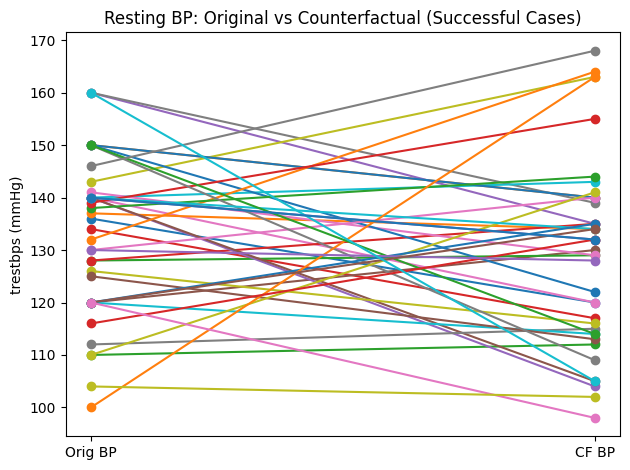

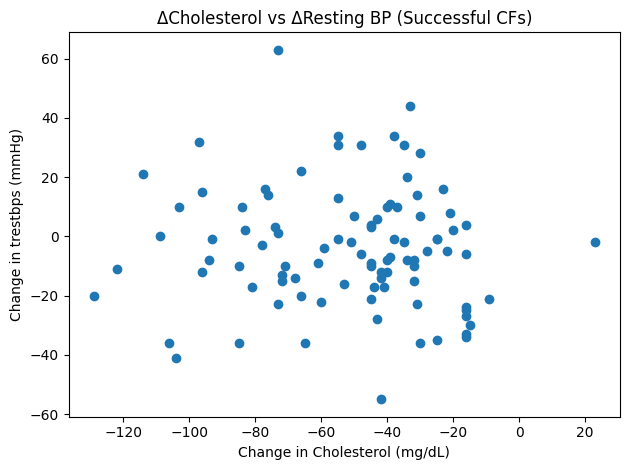

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 2. Patient‑level summary: success vs. unsuccessful
patient_df = (
    df_scm
    .groupby("instance_id")
    .agg({
        "target_changed": "max",
        "orig_age": "first",
        "orig_sex": "first"
    })
    .reset_index()
)
patient_df["outcome"] = np.where(patient_df["target_changed"] == 1, "successful", "unsuccessful")

n_success = (patient_df["outcome"] == "successful").sum()
n_unsuccess = (patient_df["outcome"] == "unsuccessful").sum()
print(f"Patients with ≥1 successful CF: {n_success}")
print(f"Patients with no successful CF: {n_unsuccess}")

# 3. Demographic summaries by outcome
for grp, sub in patient_df.groupby("outcome"):
    print(f"\n--- {grp.upper()} PATIENTS ---")
    print(f"Count: {len(sub)}")
    print(f"Age: mean = {sub['orig_age'].mean():.1f}, std = {sub['orig_age'].std():.1f}, range = [{sub['orig_age'].min()}, {sub['orig_age'].max()}]")
    males = (sub["orig_sex"] == 1).sum()
    females = (sub["orig_sex"] == 0).sum()
    print(f"Sex (M:F) = {males}:{females}")

# 4. Counterfactual‑level subset of successful cases
df_success = df_scm[df_scm["target_changed"] == 1]

# Helper to compute change metrics
def compute_change_metrics(df, orig_col, cf_col, better_if="lower"):
    diff = df[cf_col] - df[orig_col]
    decreased = (diff < 0).sum()
    increased = (diff > 0).sum()
    unchanged = (diff == 0).sum()
    pct = lambda x: x / len(df) * 100
    mean_orig = df[orig_col].mean()
    mean_cf = df[cf_col].mean()
    mean_diff = mean_cf - mean_orig
    return {
        f"{orig_col}_decreased_%": pct(decreased),
        f"{orig_col}_increased_%": pct(increased),
        f"{orig_col}_unchanged_%": pct(unchanged),
        f"mean_orig_{orig_col}": mean_orig,
        f"mean_cf_{cf_col}": mean_cf,
        f"mean_diff_{orig_col}": mean_diff,
    }

# 5. Downstream diagnostic feature changes
metrics = {}
metrics.update(compute_change_metrics(df_success, "orig_trestbps", "cf_trestbps"))
metrics.update(compute_change_metrics(df_success, "orig_cp",      "cf_cp",      better_if="lower"))
# Exercise‑induced angina: 1→0 and 0→1
exang_1to0 = ((df_success["orig_exang"] == 1) & (df_success["cf_exang"] == 0)).sum()
exang_0to1 = ((df_success["orig_exang"] == 0) & (df_success["cf_exang"] == 1)).sum()
metrics["exang_1_to_0_%"] = exang_1to0 / len(df_success) * 100
metrics["exang_0_to_1_%"] = exang_0to1 / len(df_success) * 100
metrics.update(compute_change_metrics(df_success, "orig_oldpeak", "cf_oldpeak", better_if="lower"))
metrics.update(compute_change_metrics(df_success, "orig_thalach", "cf_thalach", better_if="higher"))
metrics.update(compute_change_metrics(df_success, "orig_slope",   "cf_slope",   better_if="lower"))
# Resting ECG: treat as categorical diff
restecg_diff = df_success["cf_restecg"] - df_success["orig_restecg"]
metrics["restecg_no_change_%"] = (restecg_diff == 0).sum() / len(df_success) * 100
metrics["restecg_improved_%"]   = (restecg_diff < 0).sum() / len(df_success) * 100
metrics["restecg_worsened_%"]   = (restecg_diff > 0).sum() / len(df_success) * 100

# 6. Print summary table
summary_df = pd.DataFrame.from_dict(metrics, orient="index", columns=["value"])
print("\n--- Downstream Diagnostic Changes (Successful CFs) ---")
print(summary_df)

# 7. Suggested visualizations
# 7a. Outcome success rate
plt.figure()
patient_df["outcome"].value_counts().plot(kind="bar")
plt.title("Patients: Successful vs Unsuccessful Counterfactuals")
plt.ylabel("Number of Patients")
plt.xlabel("Outcome")
plt.tight_layout()

# 7b. Age distribution boxplot
plt.figure()
patient_df.boxplot(column="orig_age", by="outcome")
plt.title("Age by Outcome Group")
plt.suptitle("")
plt.ylabel("Age (years)")
plt.tight_layout()

# 7c. Sex distribution
plt.figure()
patient_df["orig_sex"].map({1:"Male", 0:"Female"}).value_counts().plot(kind="bar")
plt.title("Sex Distribution")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.tight_layout()

# 7d. Paired trestbps before vs after (successful CFs)
plt.figure()
for pid, grp in df_success.groupby("instance_id"):
    plt.plot(
        [0, 1],
        [grp["orig_trestbps"].iloc[0], grp["cf_trestbps"].iloc[0]],
        marker='o'
    )
plt.xticks([0, 1], ["Orig BP", "CF BP"])
plt.title("Resting BP: Original vs Counterfactual (Successful Cases)")
plt.ylabel("trestbps (mmHg)")
plt.tight_layout()

# 7e. Scatter Δchol vs Δtrestbps
plt.figure()
delta_chol = df_success["cf_chol"] - df_success["orig_chol"]
delta_bp   = df_success["cf_trestbps"] - df_success["orig_trestbps"]
plt.scatter(delta_chol, delta_bp)
plt.title("ΔCholesterol vs ΔResting BP (Successful CFs)")
plt.xlabel("Change in Cholesterol (mg/dL)")
plt.ylabel("Change in trestbps (mmHg)")
plt.tight_layout()

# Show all plots
plt.show()


In [22]:
import pandas as pd



# Filter to successful counterfactuals
df_success = df_scm[df_scm["target_changed"] == 1]

# Define the categorical columns and their counterfactual counterparts
categorical_pairs = [
    ("orig_cp", "cf_cp", "Chest Pain (cp)"),
    ("orig_exang", "cf_exang", "Exercise‑Induced Angina (exang)"),
    ("orig_slope", "cf_slope", "ST Slope (slope)"),
    ("orig_restecg", "cf_restecg", "Resting ECG (restecg)"),
]

# Compute and print the mode for each before/after pair
for orig_col, cf_col, name in categorical_pairs:
    mode_orig = df_success[orig_col].mode().iat[0]
    mode_cf   = df_success[cf_col].mode().iat[0]
    print(f"{name}: mode before = {mode_orig}, mode after = {mode_cf}")


Chest Pain (cp): mode before = 4.0, mode after = 3.0
Exercise‑Induced Angina (exang): mode before = 1.0, mode after = 0.0
ST Slope (slope): mode before = 2.0, mode after = 1.0
Resting ECG (restecg): mode before = 0.0, mode after = 0.0


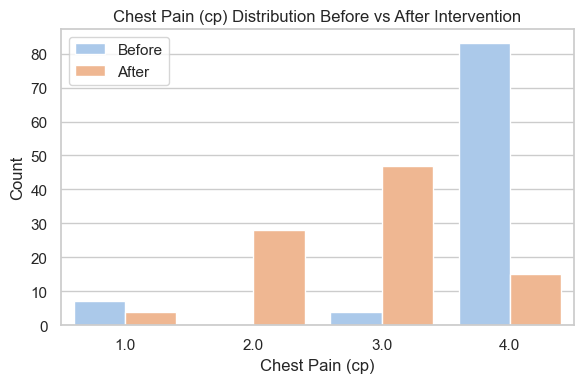

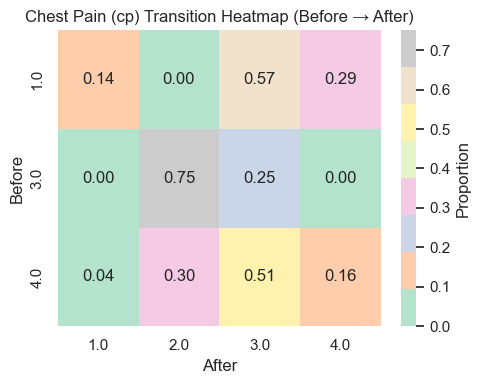

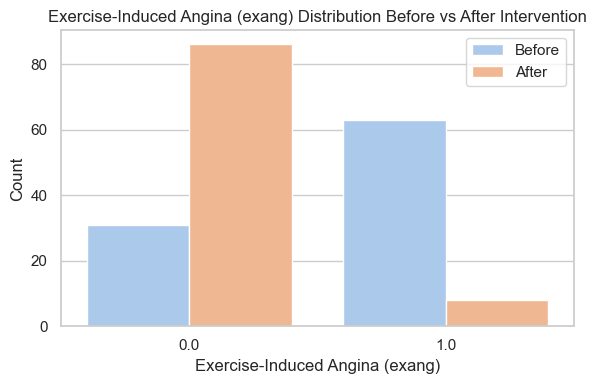

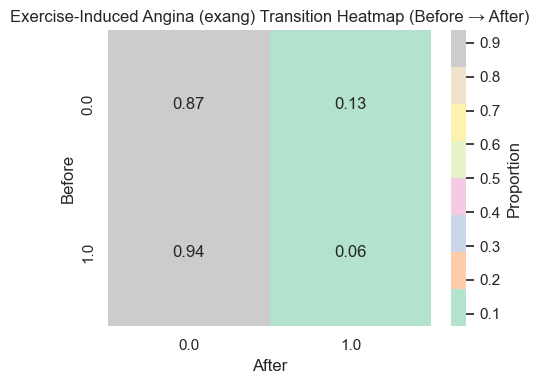

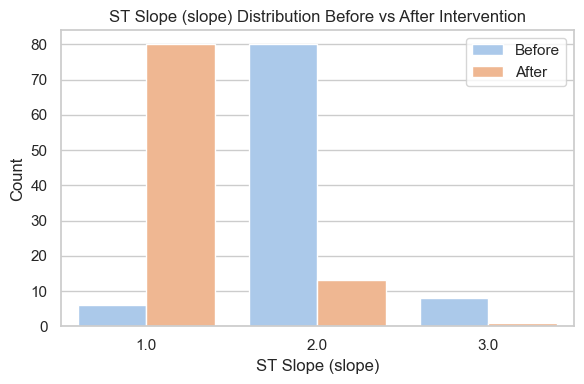

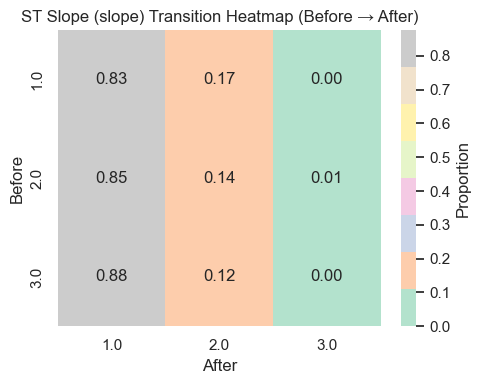

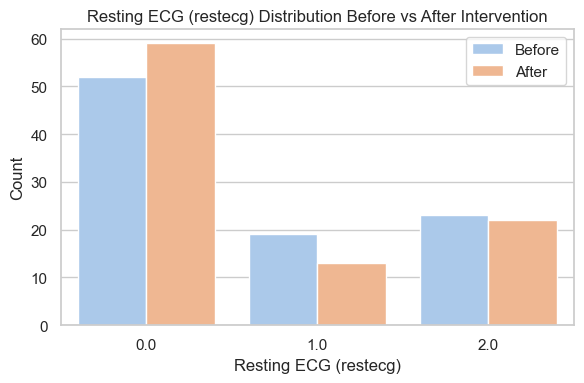

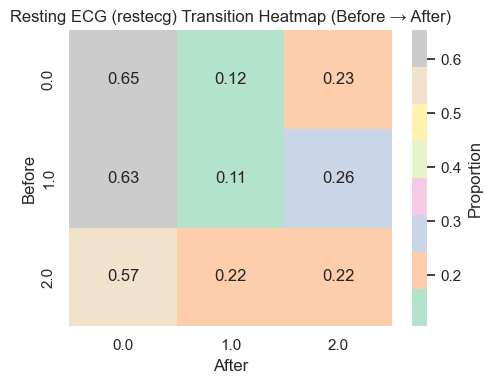

In [32]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Define categorical columns and labels
categorical_pairs = [
    ("orig_cp", "cf_cp", "Chest Pain (cp)"),
    ("orig_exang", "cf_exang", "Exercise-Induced Angina (exang)"),
    ("orig_slope", "cf_slope", "ST Slope (slope)"),
    ("orig_restecg", "cf_restecg", "Resting ECG (restecg)"),
]

# Set seaborn style and pastel palette
sns.set(style="whitegrid", palette="pastel")

for orig_col, cf_col, label in categorical_pairs:
    # Melt data for countplot
    melt_df = pd.melt(
        df_success[[orig_col, cf_col]],
        value_vars=[orig_col, cf_col],
        var_name="Stage",
        value_name=label
    )
    # Map stage names
    melt_df["Stage"] = melt_df["Stage"].map({orig_col: "Before", cf_col: "After"})
    
    # Bar plot for category distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(data=melt_df, x=label, hue="Stage", palette="pastel")
    plt.title(f"{label} Distribution Before vs After Intervention")
    plt.xlabel(label)
    plt.ylabel("Count")
    plt.legend(title="")
    plt.tight_layout()
    plt.show()
    
    # Transition heatmap
    transition = pd.crosstab(df_success[orig_col], df_success[cf_col], normalize='index')
    plt.figure(figsize=(5, 4))
    sns.heatmap(transition, annot=True, fmt=".2f", cmap="Pastel2", cbar_kws={'label': 'Proportion'})
    plt.title(f"{label} Transition Heatmap (Before → After)")
    plt.xlabel("After")
    plt.ylabel("Before")
    plt.tight_layout()
    plt.show()